In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

## 1. Dataset Analysis


In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# finding the shape of the dataset

print("No. Of Rows = ",data.shape[0])
print("No. Of Columns = ",data.shape[1])

No. Of Rows =  10000
No. Of Columns =  14


In [5]:
# information about the dataset 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# finding null values

data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# overall statistics of the dataset

data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 2. Removing Irrelevant Features

In [8]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
# dropping irrelevant features from the dataset

data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [10]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## 3. Encoding Categorical Data

In [11]:
# encoding the values of 'Geography' column using get_dummies function

data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
data = pd.get_dummies(data, drop_first = True)

In [13]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


## Before Handling Imbalanced

In [14]:
# count of each values in 'Exited' field

data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [15]:
import seaborn as sns


<Axes: xlabel='Exited', ylabel='count'>

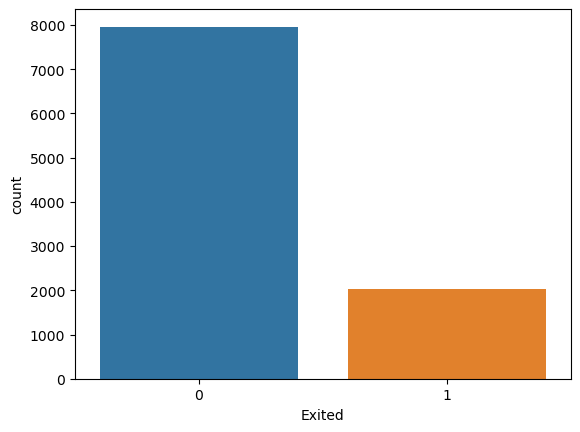

In [16]:
# barchart of 'Exited' field

sns.countplot(x=data['Exited'])

In [17]:
# assigning Independent variable & target variable

X = data.drop('Exited',axis=1)
y = data['Exited']

In [18]:
X.shape

(10000, 11)

## 4. Handling Imbalanced Dataset Using SMOTE

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
# rescaling the dataset

X_res, y_res = SMOTE().fit_resample(X,y)

In [21]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

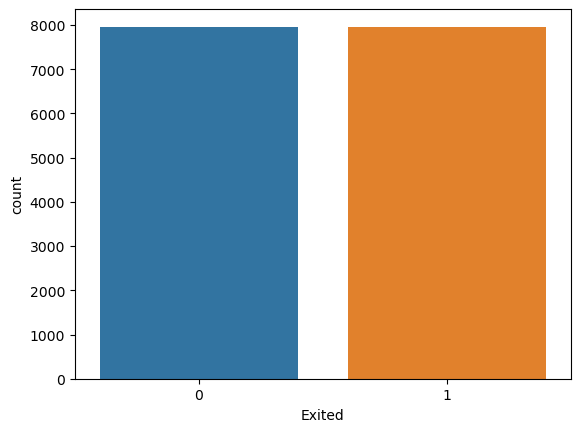

In [22]:
sns.countplot(x=y_res)

In [23]:
X_res.shape

(15926, 11)

## 5. Train Test Data Splitting

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# splitting both the independent and target variables into test and train data

X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size = 0.20, random_state=42)

## 6. Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc = StandardScaler()

In [28]:
# standardizing the independant variables using standard Scaler

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [29]:
X_train


array([[-0.04651204,  0.10494296,  0.81195777, ..., -0.57021998,
        -0.46175512, -0.84292723],
       [ 1.10603598,  0.10494296, -1.39782085, ..., -0.57021998,
        -0.46175512,  1.18634203],
       [ 0.67794672,  0.80713485, -1.02952441, ..., -0.57021998,
        -0.46175512, -0.84292723],
       ...,
       [ 0.20595086,  0.20525609,  1.18025421, ..., -0.57021998,
        -0.46175512,  1.18634203],
       [-1.53933614,  0.50619547,  0.0753649 , ..., -0.57021998,
        -0.46175512, -0.84292723],
       [ 0.5352503 ,  1.0077611 , -1.39782085, ...,  1.75370917,
        -0.46175512,  1.18634203]])

# 7. Machine Learning Algorithms

## i. Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lg  = LogisticRegression() 

In [32]:
# fitting the training data into the Algorithm

lg.fit(X_train,y_train)

LogisticRegression()

In [33]:
# assigning the testing variable

y_pred1 = lg.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score,precision_score

In [35]:
accuracy_score(y_test,y_pred1)

0.7843691148775894

In [36]:
precision_score(y_test, y_pred1)

0.770625

## ii. Support Vector Classifier

In [37]:
from sklearn import svm

In [38]:
svm = svm.SVC()

In [39]:
svm.fit(X_train, y_train)

SVC()

In [40]:
y_pred2 = svm.predict(X_test)

In [41]:
accuracy_score(y_test,y_pred2)

0.8440050219711237

In [42]:
precision_score(y_test,y_pred2)

0.8295880149812734

## iii. KNeighbors Classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier()


In [45]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [46]:
y_pred3 = knn.predict(X_test)

In [47]:
accuracy_score(y_test,y_pred3)

0.8198367859384809

In [48]:
precision_score(y_test,y_pred3)

0.7975683890577507

## iv. Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dt = DecisionTreeClassifier()

In [51]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
y_pred4 = dt.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred4)

0.7981795354676711

In [54]:
precision_score(y_test,y_pred4)

0.7847309136420526

## v. Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf = RandomForestClassifier()

In [57]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
y_pred5 = rf.predict(X_test)

In [59]:
accuracy_score(y_test,y_pred5)

0.8615819209039548

In [60]:
precision_score(y_test,y_pred5)

0.8475

## vi. Gradient Boosting Classifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
gbc = GradientBoostingClassifier()

In [63]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [64]:
y_pred6 = gbc.predict(X_test)

In [65]:
accuracy_score(y_test,y_pred6)

0.8512241054613936

In [66]:
precision_score(y_test,y_pred6)

0.8382445141065831

## 

## 8. Comparing the results of each algorithms

In [67]:
# comparing and visualizing the accuracy score for all the above ML algorithms

final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                          'Accuracy Score': [accuracy_score(y_test,y_pred1),
                                 accuracy_score(y_test,y_pred2),
                                 accuracy_score(y_test,y_pred3),
                                 accuracy_score(y_test,y_pred4),
                                 accuracy_score(y_test,y_pred5),
                                 accuracy_score(y_test,y_pred6)]})

In [68]:
final_data

,Models,Accuracy Score
0,LR,0.784369
1,SVC,0.844005
2,KNN,0.819837
3,DT,0.798180
4,RF,0.861582
5,GBC,0.851224


<Axes: xlabel='Models', ylabel='Accuracy Score'>

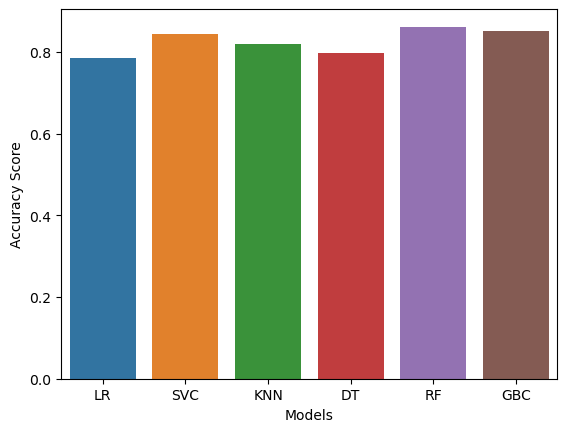

In [69]:
sns.barplot(x = final_data['Models'], y = final_data['Accuracy Score'])

In [70]:
# comparing and visualizing the precision score for each algorithms

final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                          'Precision Score': [precision_score(y_test,y_pred1),
                                 precision_score(y_test,y_pred2),
                                 precision_score(y_test,y_pred3),
                                 precision_score(y_test,y_pred4),
                                 precision_score(y_test,y_pred5),
                                 precision_score(y_test,y_pred6)]})

In [71]:
final_data

,Models,Precision Score
0,LR,0.770625
1,SVC,0.829588
2,KNN,0.797568
3,DT,0.784731
4,RF,0.847500
5,GBC,0.838245


<Axes: xlabel='Models', ylabel='Precision Score'>

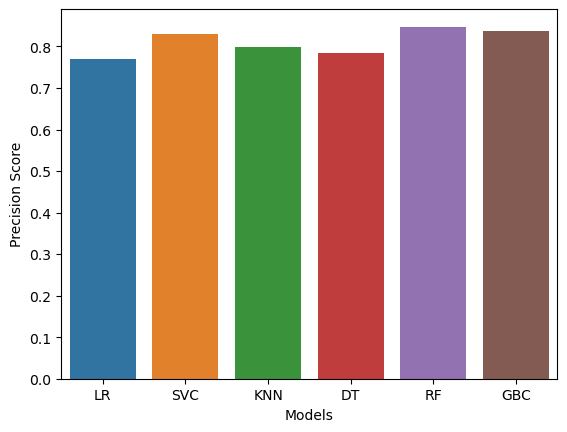

In [72]:
sns.barplot(x = final_data['Models'], y = final_data['Precision Score'])

## 9. Saving The Model

In [73]:
# fixing Random forest classifier and saving the model

X_res = sc.fit_transform(X_res)

In [74]:
rf.fit(X_res, y_res)

RandomForestClassifier()

In [75]:
import joblib

In [76]:
joblib.dump(rf,'Churn_Predict_Model')

['Churn_Predict_Model']

In [77]:
model = joblib.load('Churn_Predict_Model')

## 10. Testing our model by providing sample data points

In [78]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [79]:
model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

array([1], dtype=int64)

## 11. GUI

In [80]:
# creating a simple GUI for this prediction model using tkinter

from tkinter import *
import joblib

In [ ]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=float(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=float(e8.get())
    p9=int(e9.get())
    if p9 == 1:
        Geography_Germany=1
        Geography_Spain=0
        Geography_France=0
    elif p9 == 2:
        Geography_Germany=0
        Geography_Spain=1
        Geography_France=0
    elif p9 == 3:
        Geography_Germany=0
        Geography_Spain=0
        Geography_France=1  
    p10=int(e10.get())
    model = joblib.load('Churn_Predict_Model')
    result=model.predict(sc.transform([[p1,p2,p3,p4,
                           p5,p6,
                           p7,p8,Geography_Germany,Geography_Spain,p10]]))
    
    if result == 0:
        Label(master, text="No Churn").grid(row=31)
    else:
        Label(master, text="Churn").grid(row=31)
    
    
master = Tk()
master.title("Bank Customers Churn Prediction Using Machine Learning")


label = Label(master, text = "Customers Churn Prediction Using ML"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="CreditScore").grid(row=1)
Label(master, text="Age").grid(row=2)
Label(master, text="Tenure").grid(row=3)
Label(master, text="Balance").grid(row=4)
Label(master, text="NumOfProducts").grid(row=5)
Label(master, text="HasCrCard").grid(row=6)
Label(master, text="IsActiveMember").grid(row=7)
Label(master, text="EstimatedSalary").grid(row=8)
Label(master, text="Geography").grid(row=9)
Label(master,text="Gender").grid(row=10)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10,column=1)

Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()   